In [1]:
import pandas as pd  
import numpy as np  
import os 

In [3]:
#读取数据
data = pd.read_excel('/Users/bruce/data_for_tree.xlsx')  
data.head()  

,uid,oil_actv_dt,create_dt,total_oil_cnt,pay_amount_total,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
0,A8217710,2018-08-19,2018-08-17,275.0,48295495.4,B,0,3308.56,1760081.0,1796001.0,1731081.0,8655401.0,1.0,1.0,1,3,2,0,3
1,A8217710,2018-08-19,2018-08-16,275.0,48295495.4,B,0,4674.68,2487045.0,2537801.0,2437845.0,12189221.0,1.0,1.0,1,3,2,0,3
2,A8217710,2018-08-19,2018-08-15,275.0,48295495.4,B,0,1873.06,977845.0,997801.0,961845.0,4809221.0,1.0,1.0,1,2,2,0,3
3,A8217710,2018-08-19,2018-08-14,275.0,48295495.4,B,0,4837.78,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,2,2,0,3
4,A8217710,2018-08-19,2018-08-13,275.0,48295495.4,B,0,2586.38,1350441.0,1378001.0,1328441.0,6642201.0,1.0,1.0,1,2,2,0,3


In [4]:
org_lst = ['uid','create_dt','oil_actv_dt','class_new','bad_ind']
agg_lst = ['oil_amount','discount_amount','sale_amount','amount','pay_amount','coupon_amount','payment_coupon_amount']
dstc_lst = ['channel_code','oil_code','scene','source_app','call_source']

In [11]:
df = data[org_lst].copy()
df[agg_lst] = data[agg_lst].copy()
df[dstc_lst] = data[dstc_lst].copy()

In [15]:
base = df[org_lst].copy()
base = base.drop_duplicates(['uid'],keep = 'first')

In [16]:
base

,uid,create_dt,oil_actv_dt,class_new,bad_ind
0,A8217710,2018-08-17,2018-08-19,B,0
137,A7261706,2018-08-01,2018-08-03,B,0
380,A10920578,2018-08-31,2018-09-05,E,0
439,A1389291,2018-07-28,2018-08-01,C,0
487,A4260408,2018-09-02,2018-09-29,B,0
...,...,...,...,...,...
50604,B96436391972106043,NaT,2018-10-19,A,0
50605,B96436391976480892,NaT,2018-09-28,B,0
50606,B96436391977217468,NaT,2018-10-17,B,0
50607,B96436391984693397,NaT,2018-10-11,E,0


In [104]:
gn = pd.DataFrame()  

In [108]:
for i in agg_lst:  
    #计算个数  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                       lambda df:len(df[i])).reset_index())  
    tp.columns = ['uid',i + '_cnt']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #求历史特征值大于零的个数  
    tp = pd.DataFrame(df.groupby('uid').apply(
                          lambda df:np.where(df[i]>0,1,0).sum()).reset_index())  
    tp.columns = ['uid',i + '_num']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求和  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                  lambda df:np.nansum(df[i])).reset_index())  
    tp.columns = ['uid',i + '_tot']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求均值  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                    lambda df:np.nanmean(df[i])).reset_index())  
    tp.columns = ['uid',i + '_avg']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求最大值  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                     lambda df:np.nanmax(df[i])).reset_index())  
    tp.columns = ['uid',i + '_max']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求最小值  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                    lambda df:np.nanmin(df[i])).reset_index())  
    tp.columns = ['uid',i + '_min']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求方差  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                     lambda df:np.nanvar(df[i])).reset_index())  
    tp.columns = ['uid',i + '_var']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求极差  
    tp = pd.DataFrame(df.groupby('uid').apply(
                lambda df:np.nanmax(df[i])-np.nanmin(df[i]) ).reset_index())  
    tp.columns = ['uid',i + '_ran']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求变异系数,为防止除数为0，利用0.01进行平滑  
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmean(df[i])/(np.nanvar(df[i])+0.01))).reset_index()  
    tp.columns = ['uid',i + '_cva']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left') 

/Users/bruce/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
/Users/bruce/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN axis encountered
/Users/bruce/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: All-NaN axis encountered
/Users/bruce/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: Degrees of freedom <= 0 for slice.
/Users/bruce/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: All-NaN axis encountered
/Users/bruce/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice
/Users/bruce/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Degrees of freedom <= 0 for slice.
/Users/bruce/anaconda3/envs/python37/lib/python3.7/site-packages/i

In [128]:
gc = pd.DataFrame()  
for i in dstc_lst:  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                   lambda df: len(set(df[i]))).reset_index())  
    tp.columns = ['uid',i + '_dstc']  
    if gc.empty == True:  
        gc = tp  
    else:  
        gc = pd.merge(gc,tp,on = 'uid',how = 'left')

In [129]:
fn = base.merge(gn,on='uid').merge(gc,on='uid')  


In [131]:
fn = fn.fillna(0)

In [132]:
fn.shape

(11307, 73)

In [133]:
from sklearn import tree

In [136]:
x = fn.drop(org_lst, axis=1)

In [138]:
y = fn.bad_ind.copy()

In [140]:
dtree = tree.DecisionTreeRegressor(max_depth = 2,
                                  min_samples_leaf = 500,
                                  min_samples_split = 5000)

In [142]:
dtree = dtree.fit(x,y)

In [151]:
#输出决策树图像
os.environ["PATH"] +=os.pathsep + '/Users/bruce/'
import pydotplus
from IPython.display import Image
from six import StringIO
import os

In [152]:
dot_data = StringIO()
tree.export_graphviz(dtree, out_file=dot_data,
                    feature_names=x.columns,
                    class_names=['bad_ind'],
                    filled=True, rounded=True,
                    special_characters=True)

In [153]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

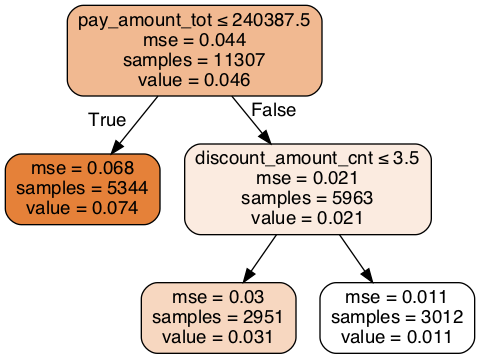

In [157]:
Image(graph.create_png())

In [158]:
dff1 = fn.loc[(fn.amount_tot>9614.5)&(fn.coupon_amount_cnt>6)].copy()  
dff1['level'] = 'past_A'  
dff2 = fn.loc[(fn.amount_tot>9614.5)&(fn.coupon_amount_cnt<=6)].copy()  
dff2['level'] = 'past_B'  
dff3 = fn.loc[fn.amount_tot<=9614.5].copy()  
dff3['level'] = 'past_C'

,uid,create_dt,oil_actv_dt,class_new,bad_ind,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,oil_amount_max,...,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_ran,payment_coupon_amount_cva,channel_code_dstc,oil_code_dstc,scene_dstc,source_app_dstc,call_source_dstc,level
6338,A12326628,2018-09-04 00:00:00,2018-09-07,B,0,1,1,28.60,28.60,28.60,...,0.0,0.0,0.0,0.0,1,1,1,1,1,past_C
6339,A7118638,2018-06-07 00:00:00,2018-07-30,B,0,1,1,36.78,36.78,36.78,...,0.0,0.0,0.0,0.0,1,1,1,1,1,past_C
6340,A3401596,2018-06-12 00:00:00,2018-07-25,D,0,1,1,1.28,1.28,1.28,...,0.0,0.0,0.0,0.0,1,1,1,1,1,past_C
6341,A7887883,2018-05-19 00:00:00,2018-09-24,F,1,1,1,1.34,1.34,1.34,...,0.0,0.0,0.0,0.0,1,1,1,1,1,past_C
6342,A2043411,2018-07-22 00:00:00,2018-07-26,B,0,1,1,1.06,1.06,1.06,...,0.0,0.0,0.0,0.0,1,1,1,1,1,past_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11302,B96436391972106043,0,2018-10-19,A,0,1,0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,1,1,1,1,1,past_C
11303,B96436391976480892,0,2018-09-28,B,0,1,0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,1,1,1,1,1,past_C
11304,B96436391977217468,0,2018-10-17,B,0,1,0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,1,1,1,1,1,past_C
11305,B96436391984693397,0,2018-10-11,E,0,1,0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,1,1,1,1,1,past_C
